In [1]:
import geopandas as gpd
import pandas as pd
import pandas as pd
from shapely.geometry import Point
from shapely.ops import linemerge, Polygon, LineString
from shapely.geometry import MultiLineString
import matplotlib.pyplot as plt
import plotly.express as px
from typing import List

C:\Users\artir\Miniconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
pd.set_option('display.max_rows', None)

In [3]:
roads_gdf = gpd.read_file('')

In [5]:
roads_gdf = roads_gdf[roads_gdf['Section_ID'].notnull()]
#roads_gdf.head()

In [6]:
roads_gdf.columns

Index(['osm_id', 'lanes', 'highway', 'smoothness', 'layer', 'name', 'source',
       'surface', 'width', 'bridge', 'oneway', 'length', 'parish',
       'Section_ID', 'U/R', 'comment', 'new_length', 'geometry'],
      dtype='object')

In [7]:
roads_gdf.shape[0]

534

In [8]:
names = roads_gdf['name'].dropna()
print(sorted(names.unique()))

['Achterdam', 'Anamoestraat', 'Anton Dragtenweg', 'Avobakaweg', 'Biswamitreweg', 'Bomaweg', 'Bonistraat', 'Brownsweg', 'Cassialaan', 'Coesewijnestraat', 'Commissaris Roblesweg', 'Commissaris Thurkowweg', 'Cornelis Jongbawstraat', 'Dr. Sophie Redmondstraat', 'G.G. Maynardstraat', 'Garnizoenspad', 'Gemenelandsweg', 'Gladiolenstraat', 'Gravenbergstraat', 'Hamburgstraat', 'Henck Arronstraat', 'Hendrikstraat', 'Indira Gandhiweg', 'Industrieweg Noord', 'Industrieweg Zuid', 'Jacques Gompertsstraat', 'Johan Adolf Pengelstraat', 'Johannes S. Mungrastraat', 'Kashmirstraat', 'Keizerstraat', 'Kennedyweg', 'Kernkampweg', 'Klipstenenstraat', 'Krakaweg', 'Kwattaweg', 'Lalla Rookhweg', 'Lashleystraat', 'Latourweg', 'Licaniastraat', 'Malebatrumstraat', 'Marowijnestraat', 'Meursweg', 'Molenpad', 'Mr. Dr. J.C. De Mirandastraat', 'Mr. Jaggernath Lachmonstraat', 'Mr. P. Chandie Shawweg', 'Munderweg', 'Nieuw Weergevondenweg', 'Oost Kanaalstraat', 'Oost West Verbinding Nickerie', 'Oost-West verbinding Oost',

In [9]:
columns_to_extract = ['name', 'Section_ID', 'U/R', 'parish', 'geometry']

In [10]:
roads_gdf = roads_gdf[columns_to_extract]
roads_gdf.head()

,name,Section_ID,U/R,parish,geometry
7,Weg naar Wijdenboschbrug,Wwij/001/RoHo-JWbr,urban,Paramaribo,"LINESTRING (-55.17258 5.80626, -55.17250 5.806..."
12,Johan Adolf Pengelstraat,Peng/001/JaLa-Gmnl,urban,Paramaribo,"LINESTRING (-55.17783 5.81431, -55.17761 5.814..."
18,Johannes S. Mungrastraat,JoMu/001/Krnk-2eRW,urban,Paramaribo,"LINESTRING (-55.18508 5.83110, -55.18605 5.831..."
19,Mr. Jaggernath Lachmonstraat,JagL/001/Leys-LaRo,urban,Paramaribo,"LINESTRING (-55.20558 5.81323, -55.20557 5.813..."
20,Mr. Jaggernath Lachmonstraat,JagL/001/Leys-LaRo,urban,Paramaribo,"LINESTRING (-55.20552 5.81304, -55.20566 5.813..."


In [11]:
roads_gdf.shape[0]

534

In [12]:
roads_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
roads = roads_gdf.dissolve(by=['name', 'Section_ID']).reset_index()

In [15]:
roads.shape[0]

228

In [16]:
#roads.head(200)

In [17]:
def merge_linestrings(geom):
    if isinstance(geom, MultiLineString):
        return linemerge(geom)
    else:
        return geom

In [18]:
merged_gdf = roads.copy()

In [19]:
merged_gdf.shape[0]

228

In [20]:
merged_gdf['geometry'] = merged_gdf['geometry'].apply(merge_linestrings)

In [21]:
#merged_gdf['geometry'] = merged_gdf['geometry'].apply(merge_linestrings)

In [22]:
merged_gdf.shape[0]

228

C:\Users\artir\Miniconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

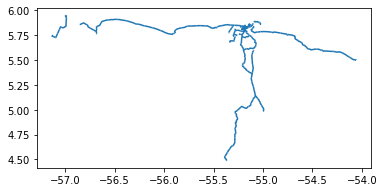

In [25]:
merged_gdf.plot()

In [26]:
merged_gdf['geometry'] = merged_gdf['geometry'].to_crs(crs=3857)

In [27]:
merged_gdf['length'] = merged_gdf['geometry'].length
merged_gdf.head()

,name,Section_ID,geometry,U/R,parish,length
0,Achterdam,Adam/001/Lash-Wtrl,"LINESTRING (-6344891.588 662306.080, -6344803....",urban,Nickerie,1192.469808
1,Anamoestraat,Anmo/001/Plto-JoIs,"LINESTRING (-6139034.851 651874.998, -6139004....",urban,Paramaribo,1349.186168
2,Anamoestraat,Anmo/002/JoIs-Klne,"LINESTRING (-6138360.926 653043.616, -6138354....",urban,Paramaribo,1517.271849
3,Anton Dragtenweg,AnDr/001/Mhny-MrCu,"LINESTRING (-6138099.426 650297.366, -6138083....",urban,Paramaribo,1906.095615
4,Anton Dragtenweg,AnDr/002/MrCu-Boni,"LINESTRING (-6136303.188 650922.203, -6136296....",urban,Paramaribo,1543.048599


In [28]:
merged_gdf['geometry'] = merged_gdf['geometry'].to_crs(crs=4326)
merged_gdf.head()

,name,Section_ID,geometry,U/R,parish,length
0,Achterdam,Adam/001/Lash-Wtrl,"LINESTRING (-56.99713 5.93893, -56.99634 5.938...",urban,Nickerie,1192.469808
1,Anamoestraat,Anmo/001/Plto-JoIs,"LINESTRING (-55.14789 5.84572, -55.14761 5.846...",urban,Paramaribo,1349.186168
2,Anamoestraat,Anmo/002/JoIs-Klne,"LINESTRING (-55.14183 5.85617, -55.14178 5.856...",urban,Paramaribo,1517.271849
3,Anton Dragtenweg,AnDr/001/Mhny-MrCu,"LINESTRING (-55.13949 5.83163, -55.13934 5.831...",urban,Paramaribo,1906.095615
4,Anton Dragtenweg,AnDr/002/MrCu-Boni,"LINESTRING (-55.12335 5.83721, -55.12329 5.837...",urban,Paramaribo,1543.048599


In [29]:
merged_gdf.shape[0]

228

In [30]:
merged_gdf.to_csv("")

In [31]:
merged_gdf.to_file("")